# Day 08. Exercise 05
# Clustering

## 0. Imports

In [434]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [435]:
df = pd.read_csv('../data/regression.csv')
df = df.drop('pageviews', axis=1)
X = df[['num_commits', 'AVG(diff)']]
df = df.drop(columns=['uid'])

## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [436]:
kmeans = KMeans(n_clusters=3, random_state=21)
clusters = kmeans.fit_predict(X)

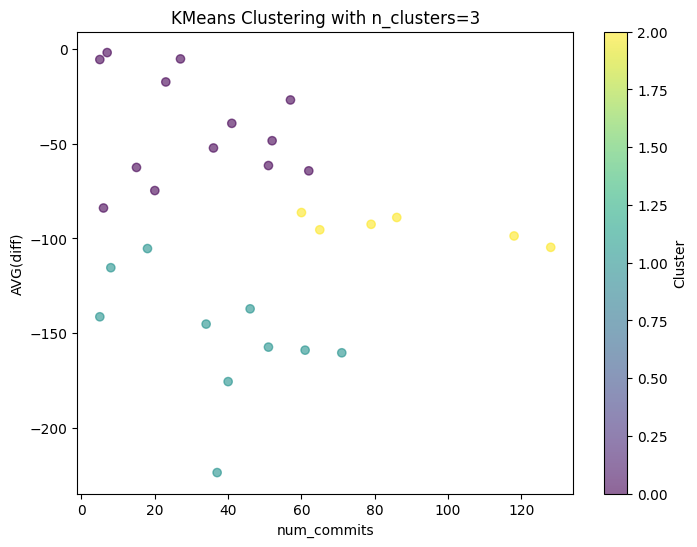

In [437]:
df['cluster'] = clusters

plt.figure(figsize=(8,6))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title('KMeans Clustering with n_clusters=3')
plt.colorbar(label='Cluster')
plt.show()

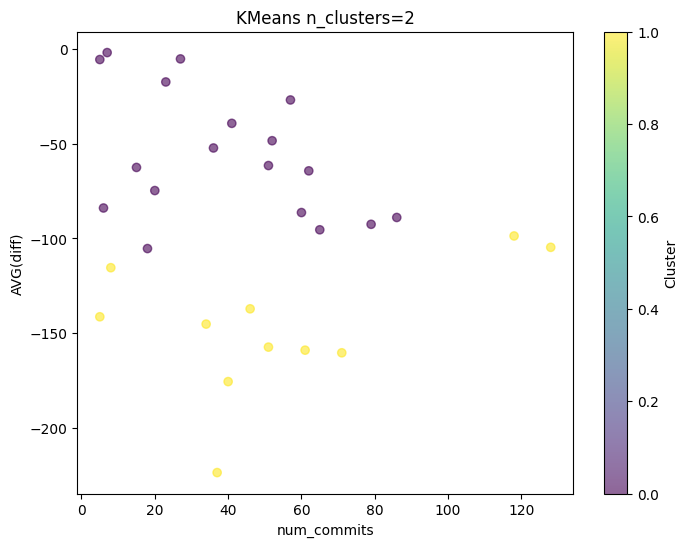

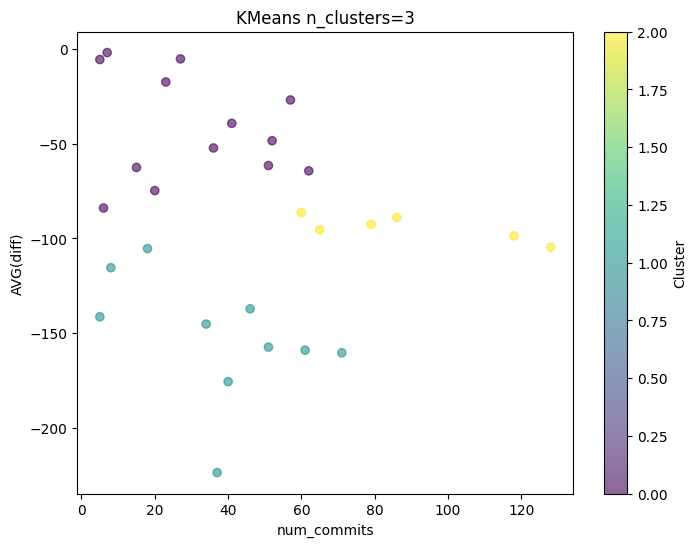

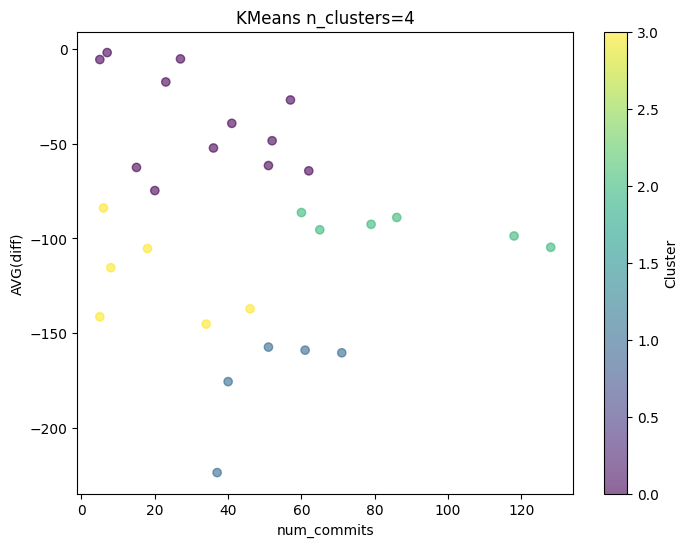

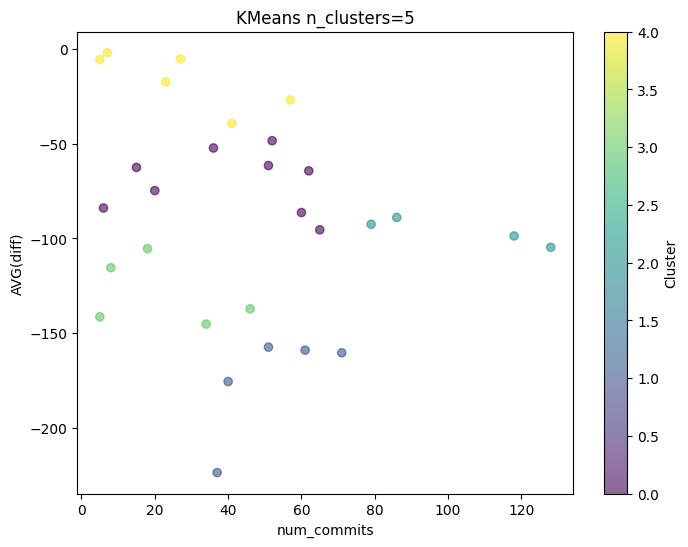

In [438]:
for n in range(2, 6):
    kmeanss = KMeans(n_clusters=n, random_state=21)
    clusterss = kmeanss.fit_predict(X)
    plt.figure(figsize=(8,6))
    plt.scatter(X['num_commits'], X['AVG(diff)'], c=clusterss, cmap='viridis', alpha=0.6)
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')
    plt.title(f'KMeans n_clusters={n}')
    plt.colorbar(label='Cluster')
    plt.show()

In [439]:
sil_score = silhouette_score(X, clusters)
sil_score

0.4454402135233297

## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [440]:
dbscan = DBSCAN(eps=20, min_samples=2)
clusters = dbscan.fit_predict(X)
df['cluster'] = clusters

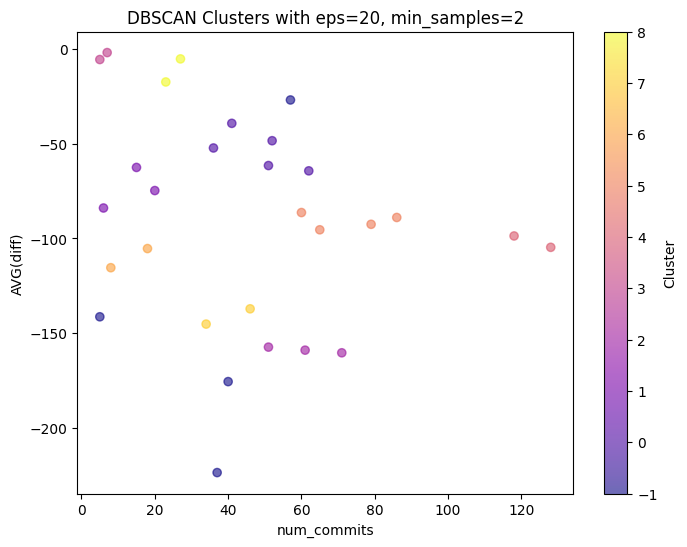

In [441]:
plt.figure(figsize=(8,6))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=clusters, cmap='plasma', alpha=0.6)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title('DBSCAN Clusters with eps=20, min_samples=2')
plt.colorbar(label='Cluster')
plt.show()

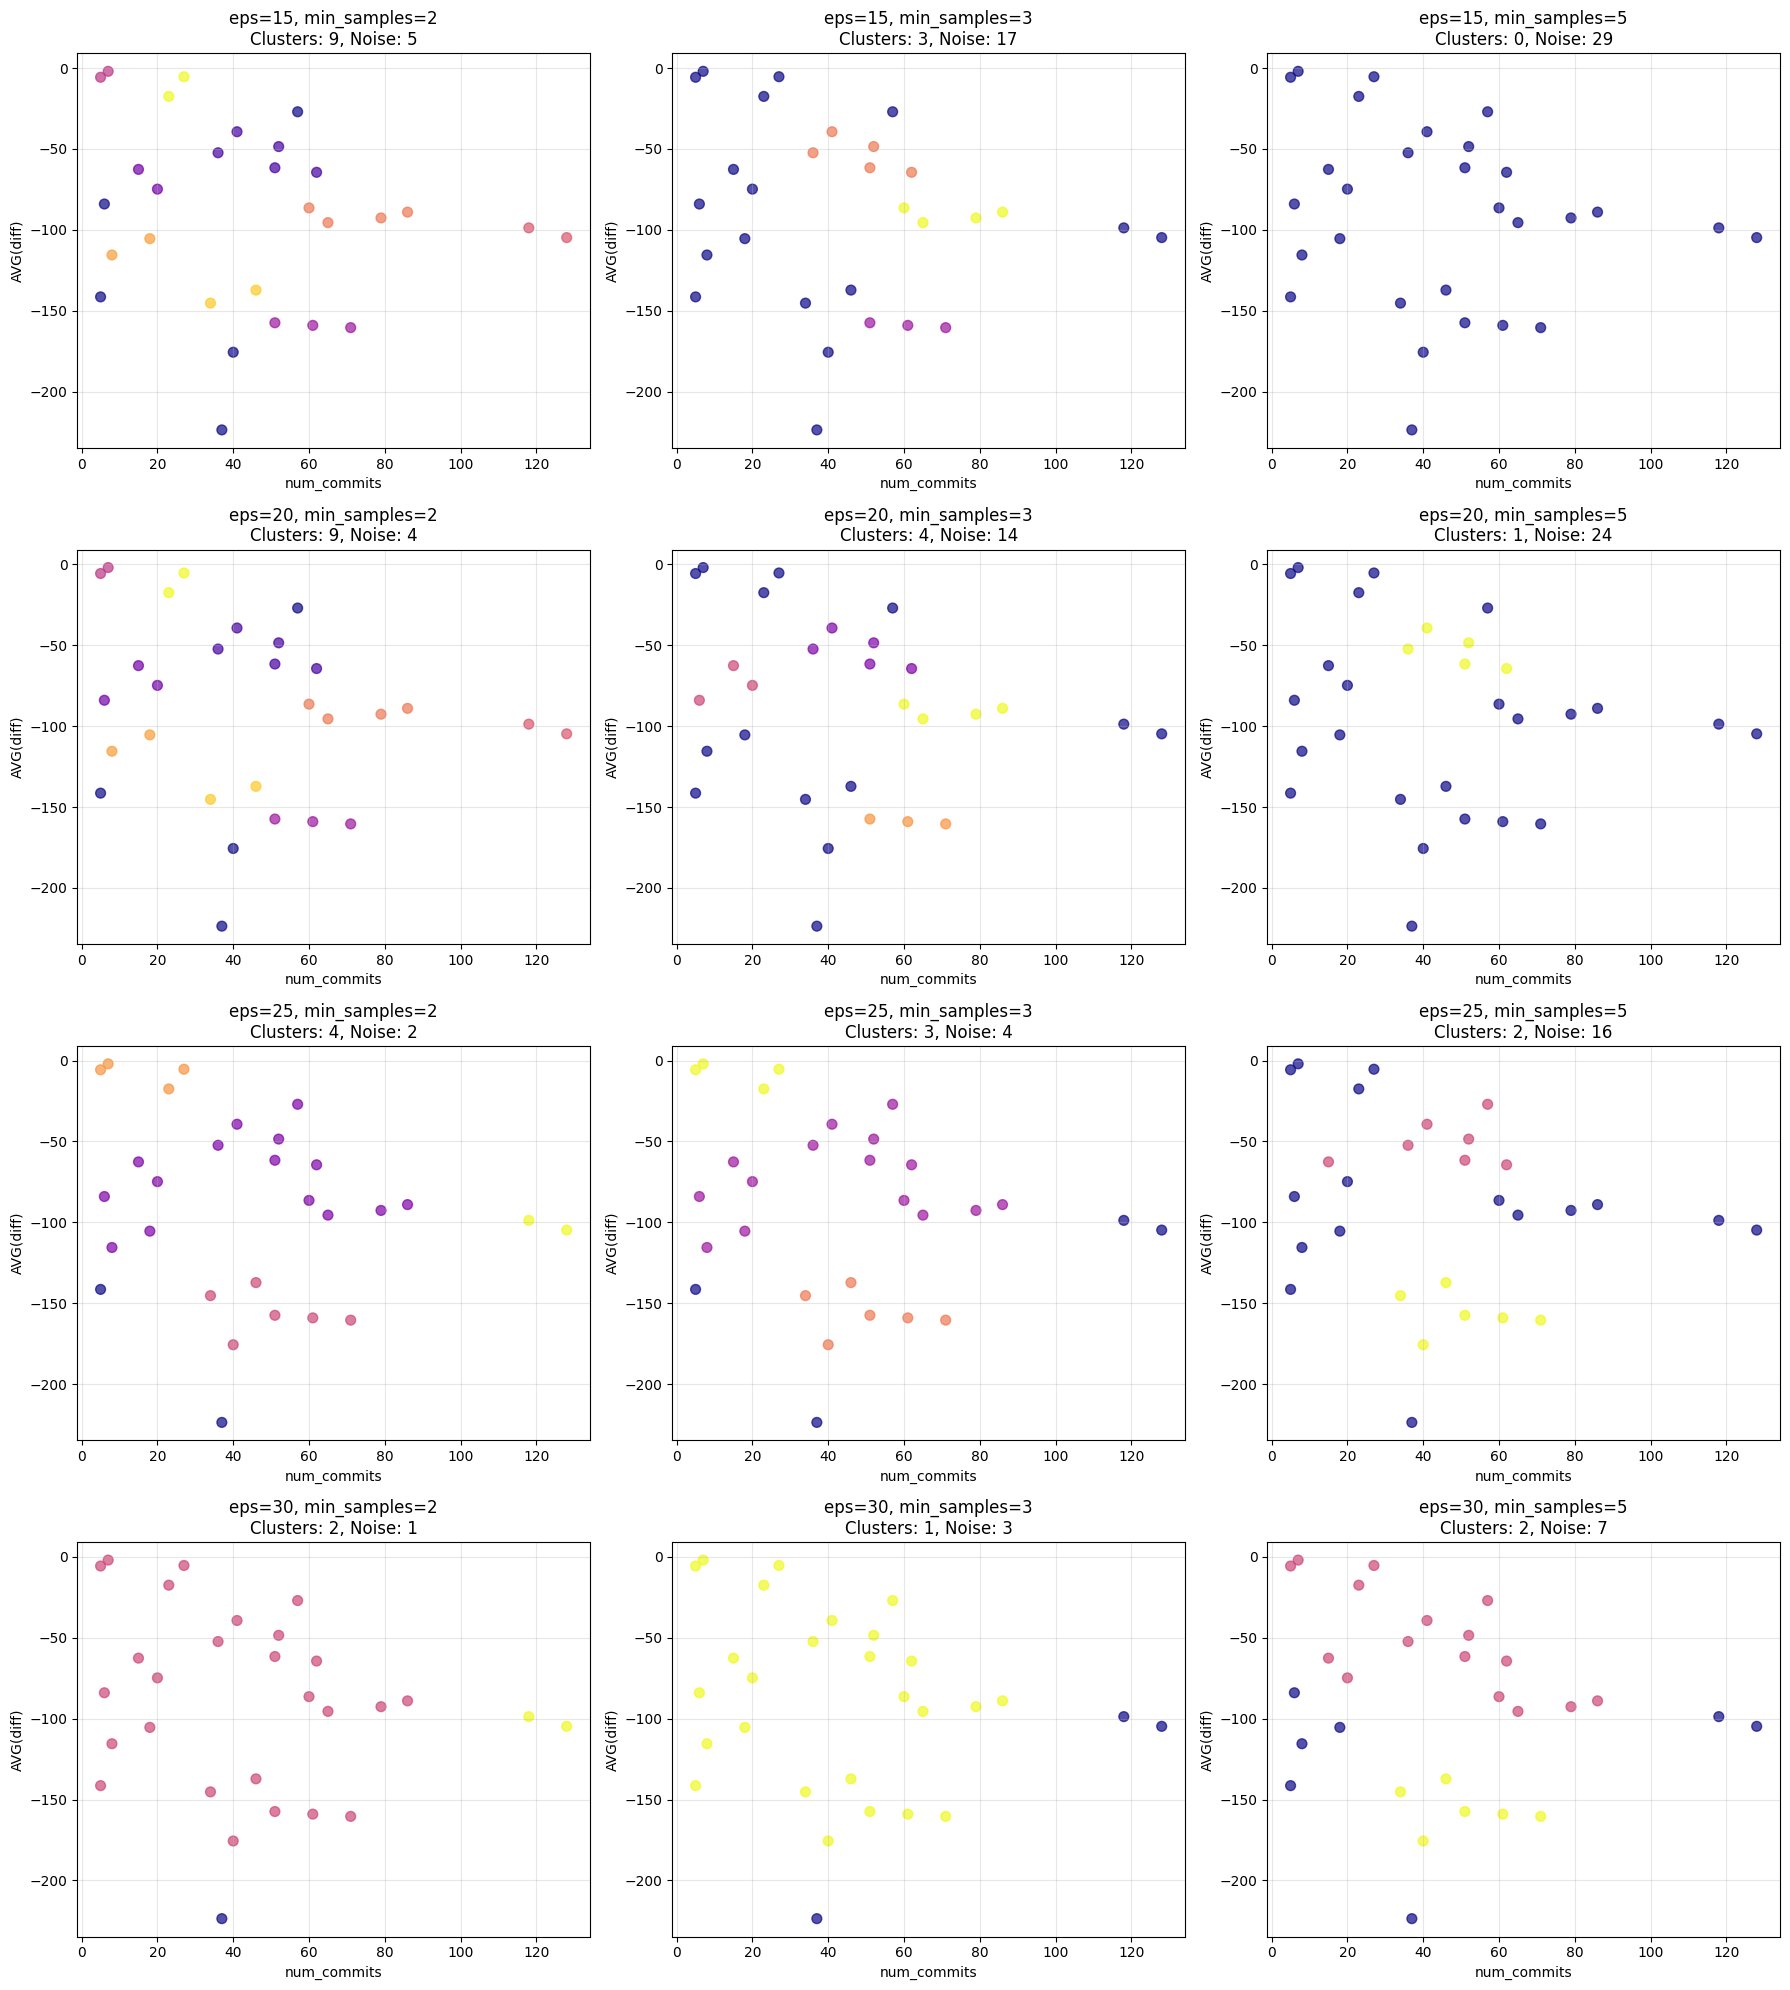

In [442]:
eps_values = [15, 20, 25, 30]
min_samples_values = [2, 3, 5]

fig, axes = plt.subplots(len(eps_values), len(min_samples_values), 
                        figsize=(18, 20))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscann = DBSCAN(eps=eps, min_samples=min_samples)
        clusterss = dbscann.fit_predict(X)
        
        ax = axes[i, j]
        scatter = ax.scatter(X['num_commits'], X['AVG(diff)'], 
                           c=clusterss, cmap='plasma', alpha=0.7, s=50)
        
        n_clusters = len(set(clusterss)) - (1 if -1 in clusterss else 0)
        n_noise = (clusterss == -1).sum()
        
        ax.set_title(f'eps={eps}, min_samples={min_samples}\n'
                    f'Clusters: {n_clusters}, Noise: {n_noise}')
        ax.set_xlabel('num_commits')
        ax.set_ylabel('AVG(diff)')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [443]:
score = silhouette_score(df, clusters)
score

0.38898772647425733

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [444]:
agg = AgglomerativeClustering(n_clusters=5)
clusters = agg.fit_predict(X)
df['cluster'] = clusters

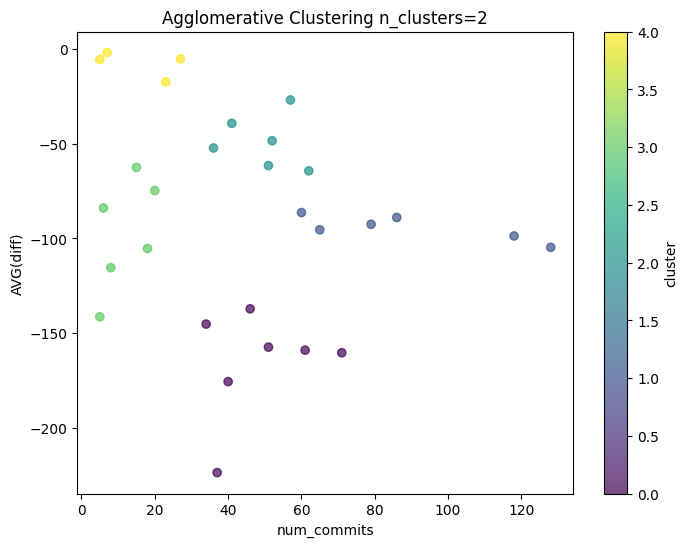

In [445]:
plt.figure(figsize=(8,6))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title(f'Agglomerative Clustering n_clusters={n_clusters}')
plt.colorbar(label='cluster')
plt.show()

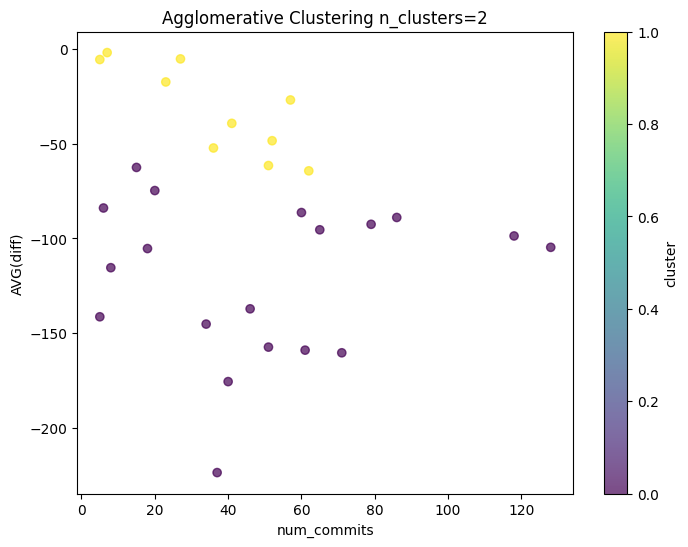

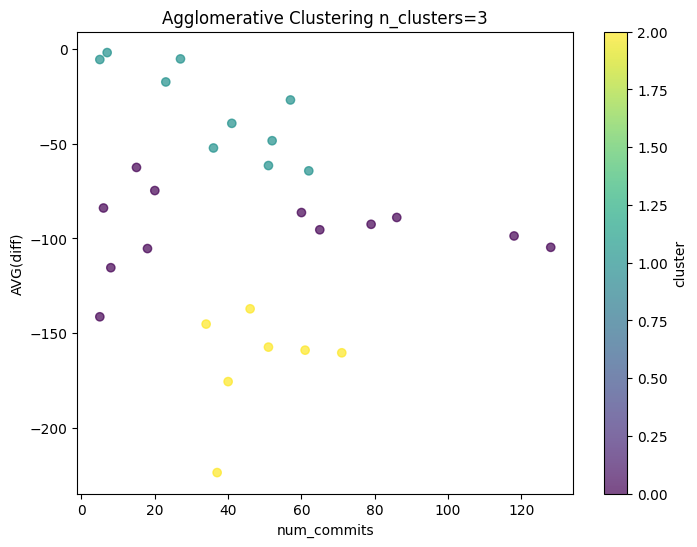

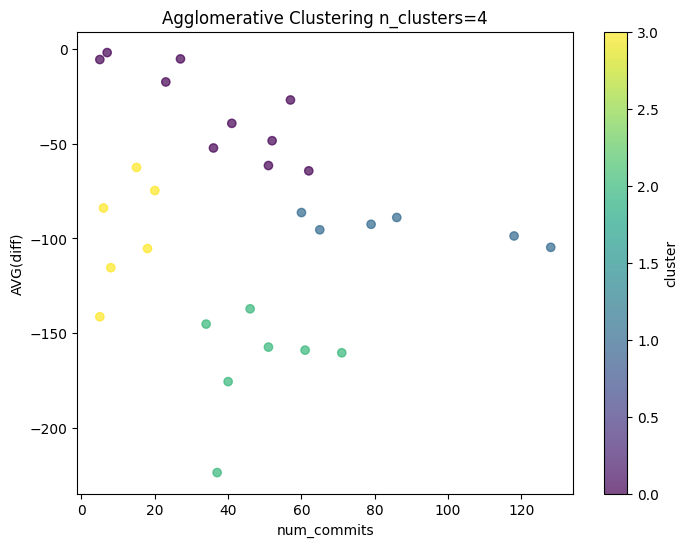

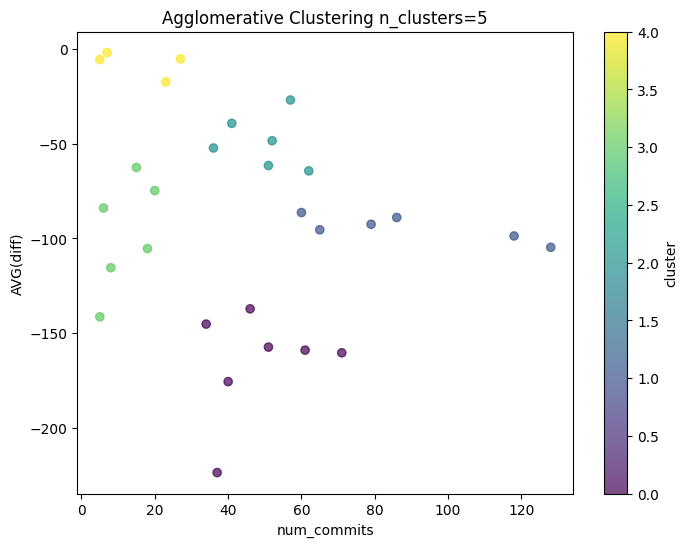

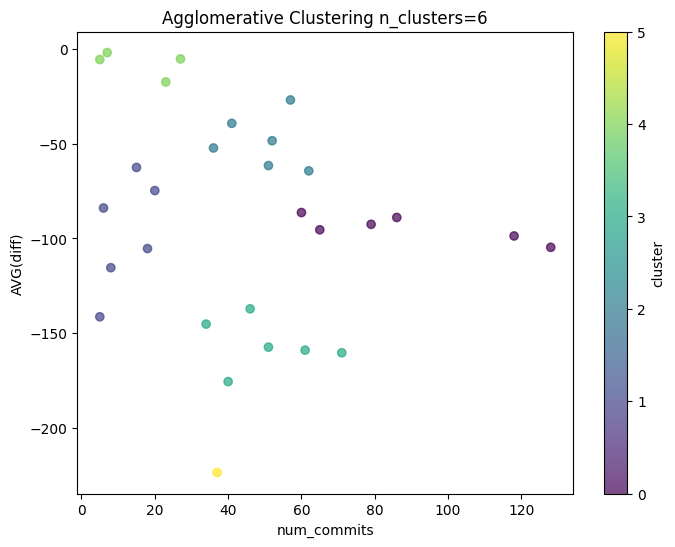

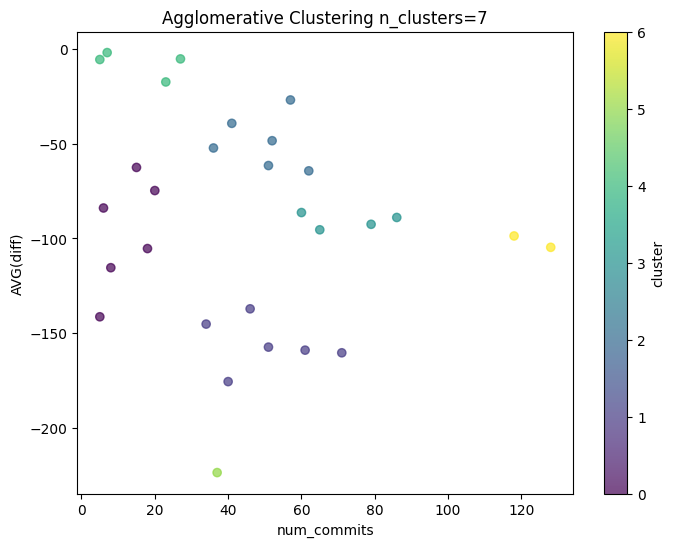

In [446]:
for k in range(2, 8):
    aggg = AgglomerativeClustering(n_clusters=k)
    cluster_labels = aggg.fit_predict(X)
    plt.figure(figsize=(8,6))
    plt.scatter(X['num_commits'], X['AVG(diff)'], c=cluster_labels, cmap='viridis', alpha=0.7)
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')
    plt.title(f'Agglomerative Clustering n_clusters={k}')
    plt.colorbar(label='cluster')
    plt.show()

In [447]:
score = silhouette_score(X, clusters)
score

0.46383015199381467

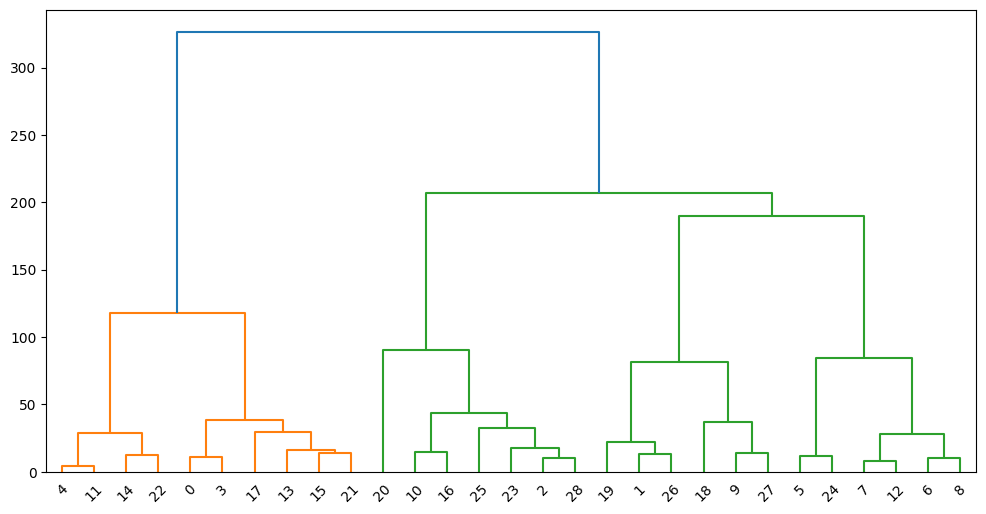

In [448]:
linked = linkage(X, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [449]:
def optimize_clustering_param(model_class, model_params, param_name, param_range, X):
    silhouette_scores = []
    for val in param_range:
        params = model_params.copy()
        params[param_name] = val
        model = model_class(**params)
        labels = model.fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters >= 2:
            score = silhouette_score(X[labels != -1], labels[labels != -1])
        else:
            score = float('nan')
        silhouette_scores.append(score)
    
    best_idx = max(range(len(silhouette_scores)), key=lambda i: silhouette_scores[i] if not isinstance(silhouette_scores[i], float) or not silhouette_scores[i] != silhouette_scores[i] else -1)
    best_val = param_range[best_idx]
    best_score = silhouette_scores[best_idx]

    best_params = model_params.copy()
    best_params[param_name] = best_val
    best_model = model_class(**best_params)
    best_labels = best_model.fit_predict(X)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].plot(param_range, silhouette_scores, marker='o')
    axes[0].set_xlabel(param_name)
    axes[0].set_ylabel('Silhouette Score')
    axes[0].set_title('Silhouette Score vs ' + param_name)
    axes[0].grid(True)

    scatter = axes[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=best_labels, cmap='viridis', alpha=0.7)
    axes[1].set_xlabel(X.columns[0])
    axes[1].set_ylabel(X.columns[1])
    axes[1].set_title(f'Clustering with best {param_name}={best_val:.2f}')
    
    fig.colorbar(scatter, ax=axes[1], label='Cluster label')

    plt.tight_layout()
    plt.show()

    return best_val, best_score

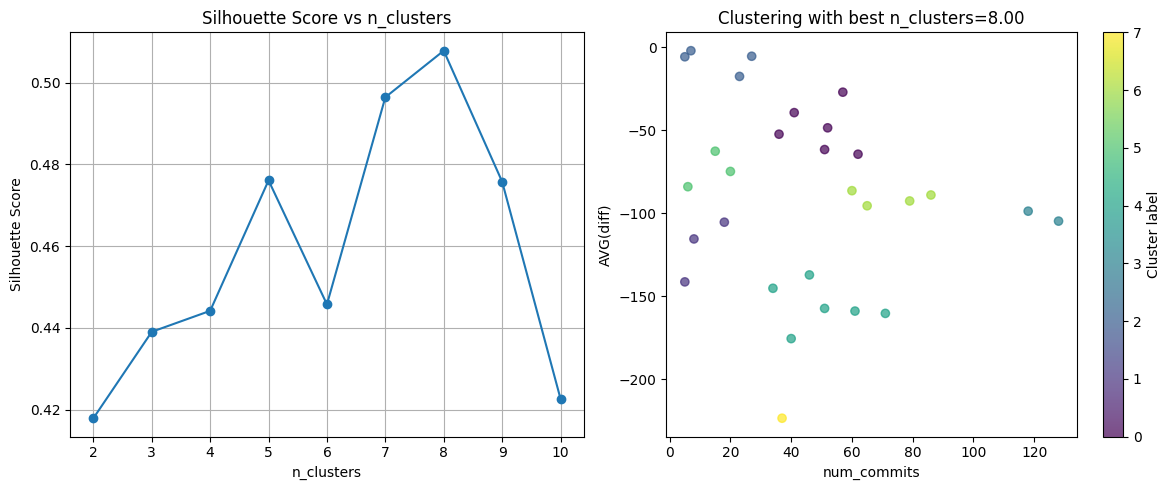

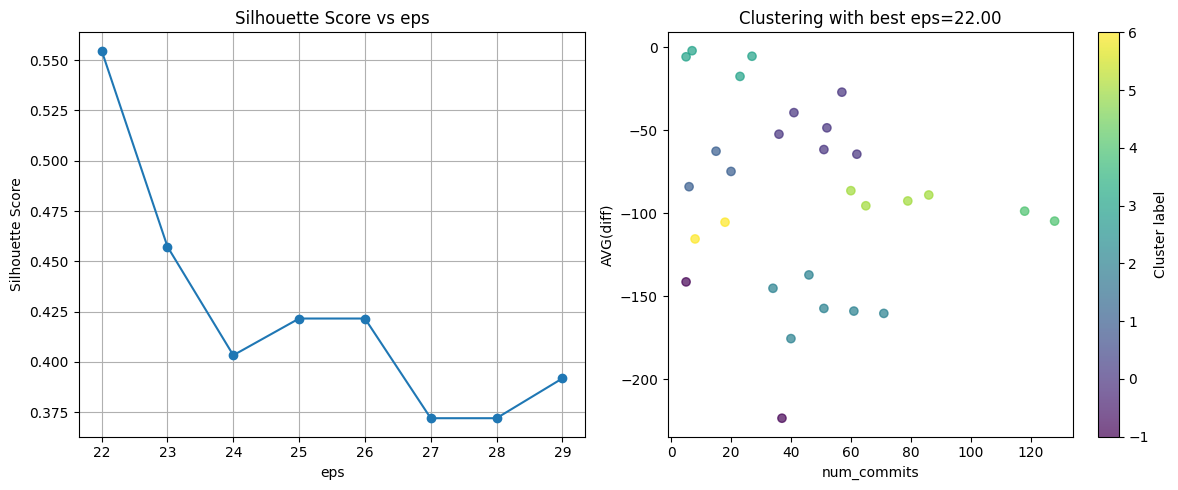

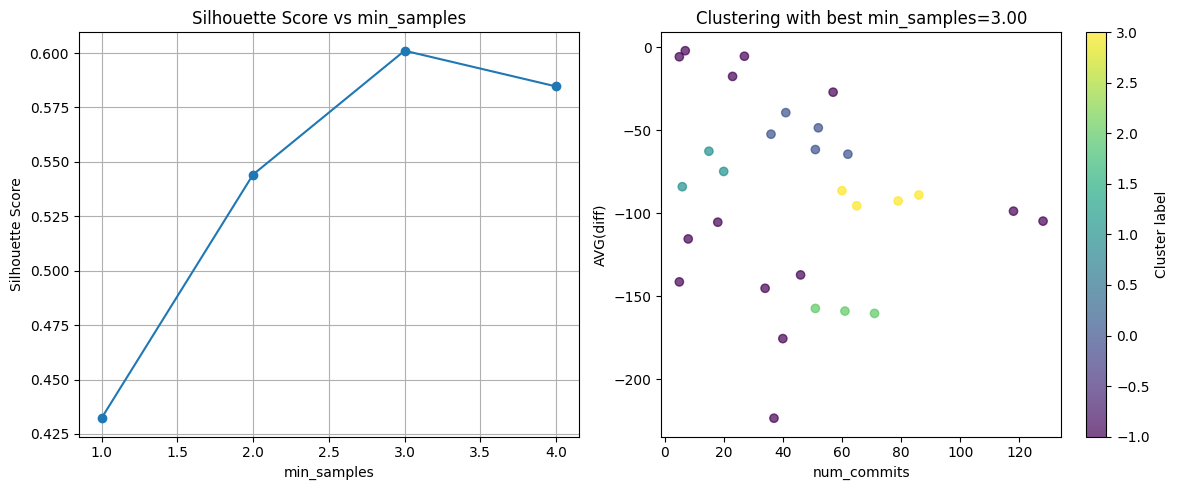

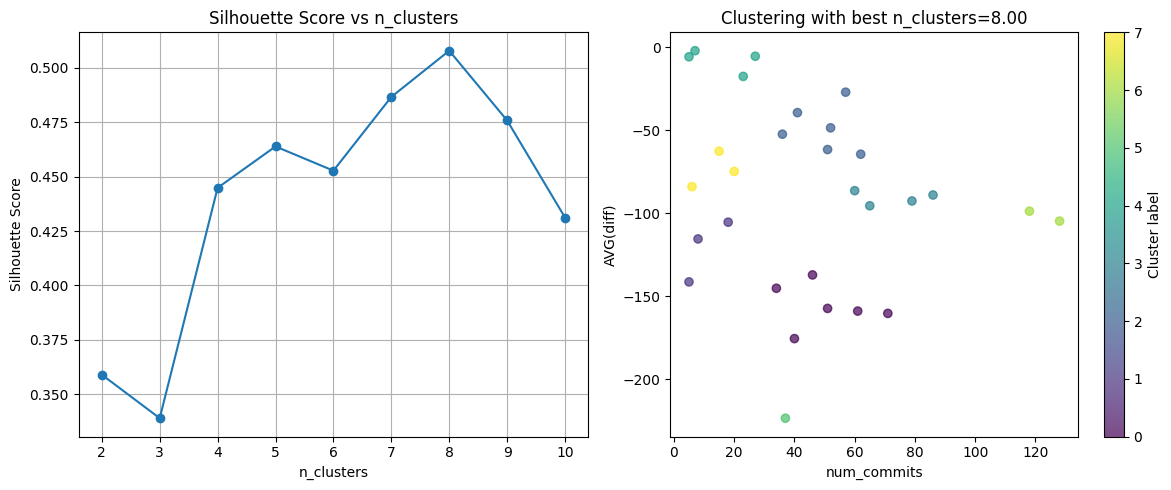

In [450]:
best_val, best_score = optimize_clustering_param(
    model_class=KMeans,
    model_params={'random_state':21, 'n_init':10},
    param_name='n_clusters',
    param_range=range(2,11),
    X=X
)

best_eps, best_eps_score = optimize_clustering_param(
    model_class=DBSCAN,
    model_params={'min_samples': 2},
    param_name='eps',
    param_range=range(22, 30),
    X=X
)

best_min_samples, best_min_samples_score = optimize_clustering_param(
    model_class=DBSCAN,
    model_params={'eps': 20}, 
    param_name='min_samples',
    param_range=range(1, 11),
    X=X
)

best_min_samples, best_min_samples_score = optimize_clustering_param(
    model_class=AgglomerativeClustering,
    model_params={}, 
    param_name='n_clusters',
    param_range=range(1, 11),
    X=X
)

